# Task: To predict patient glucose levels using a Keras-based neural network.

### Original data: https://data.world/uci/pima-indians-diabetes

## Install TensorFlow

In [1]:
devtools::install_github("rstudio/tensorflow")

Skipping install of 'tensorflow' from a github remote, the SHA1 (e4e01f10) has not changed since last install.
  Use `force = TRUE` to force installation


## Install Keras

In [2]:
devtools::install_github("rstudio/keras")

Skipping install of 'keras' from a github remote, the SHA1 (d357c68e) has not changed since last install.
  Use `force = TRUE` to force installation


## Load libraries

In [3]:
library(tensorflow)
#install_tensorflow()
library(keras)

In [4]:
install.packages("corrplot")
library(corrplot)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.84 loaded


## Load dataset

In [5]:
diabetes1<-read.csv("pima-indians-diabetes1.csv")
attach(diabetes1)

In [6]:
diabetes1

Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
9,78,25,0,31.6,0.280,38,0,72
0,70,0,0,37.9,0.334,28,1,146
0,80,0,0,32.4,0.601,27,0,91
0,70,38,0,33.2,0.170,22,0,137
3,70,30,328,35.5,0.344,35,1,158
13,70,0,0,34.2,0.251,52,0,106
2,70,99,0,34.7,0.575,62,1,197
3,86,27,156,33.3,1.154,52,1,176
10,68,0,0,31.2,0.258,41,0,122


# Feature Selection

### As we have already seen, the purpose of feature selection is to identify the features that have the most impact on the dependent variable and remove redundant features.

### The following link also contains further information on feature selection techniques for this dataset. (https://machinelearningmastery.com/feature-selection-with-the-caret-r-package/).

### This example is slightly different because feature selection is being conducted for a regression - rather than a classification problem.

## Correlation Plot

### Features that are overly correlated with each other are assumed redundant and should be removed from the model.

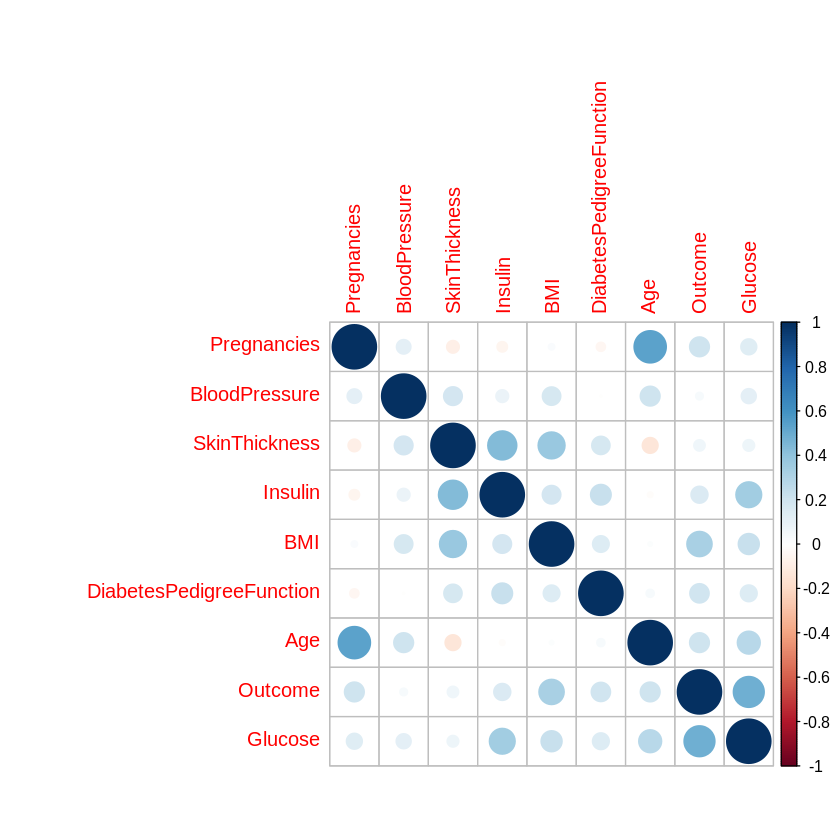

In [7]:
M <- cor(diabetes1)
corrplot(M, method = "circle")

## Display correlation coefficients

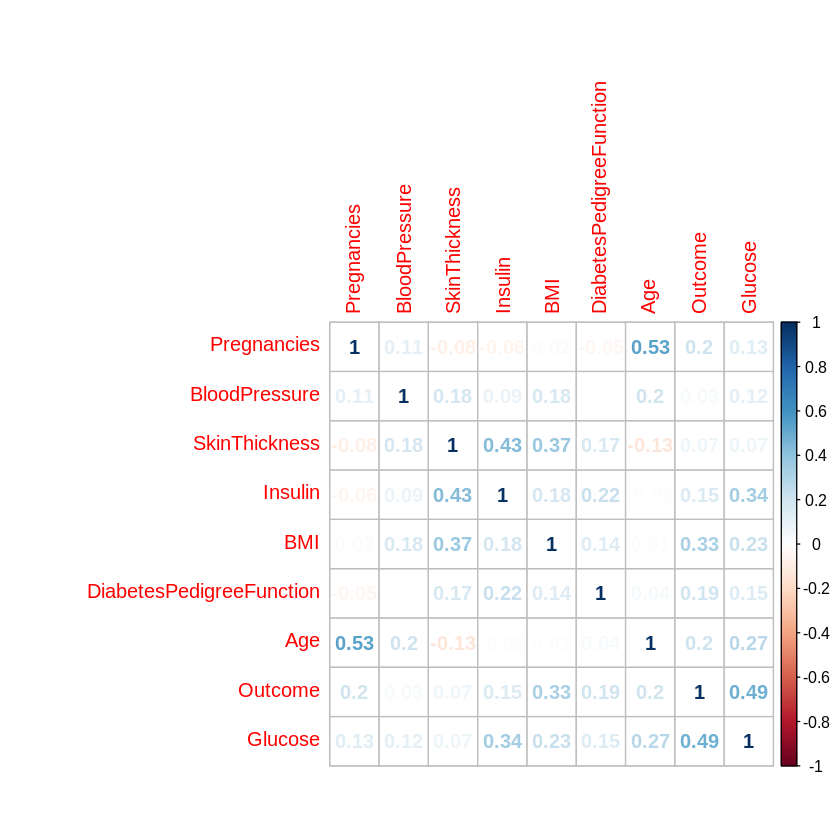

In [8]:
corrplot(M, method = "number")

## Multiple Linear Regression

### Linear regression is used to quantify the impact of features (or independent variables) on the dependent variable.

### In this case, features with a significance level of lower than 5% are kept in the model.

In [9]:
fit <- lm(Glucose ~ Pregnancies + Outcome + Age + DiabetesPedigreeFunction + BMI + Insulin + SkinThickness + BloodPressure, data=diabetes1)
summary(fit) # show results


Call:
lm(formula = Glucose ~ Pregnancies + Outcome + Age + DiabetesPedigreeFunction + 
    BMI + Insulin + SkinThickness + BloodPressure, data = diabetes1)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.709 -18.148  -2.212  15.176  80.950 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              78.401064   6.363612  12.320  < 2e-16 ***
Pregnancies              -0.481865   0.363730  -1.325  0.18575    
Outcome                  25.590805   2.384153  10.734  < 2e-16 ***
Age                       0.527262   0.106097   4.970  8.8e-07 ***
DiabetesPedigreeFunction  0.052534   3.198192   0.016  0.98690    
BMI                       0.318452   0.167106   1.906  0.05718 .  
Insulin                   0.082208   0.009843   8.352  4.8e-16 ***
SkinThickness            -0.202236   0.077372  -2.614  0.00918 ** 
BloodPressure             0.083865   0.058081   1.444  0.14929    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

In [10]:
df<-data.frame(Outcome, Age, Insulin, SkinThickness, Glucose)
attach(df)

The following objects are masked from diabetes1:

    Age, Glucose, Insulin, Outcome, SkinThickness



## Max-Min Normalization

In [11]:
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

maxmindf <- as.data.frame(lapply(df, normalize))
attach(maxmindf)
maxmindf<-as.matrix(maxmindf)

The following objects are masked from df:

    Age, Glucose, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes1:

    Age, Glucose, Insulin, Outcome, SkinThickness



## Train-validation split

In [12]:
ind <- sample(2, nrow(maxmindf), replace=TRUE, prob = c(0.7,0.3))

## Build X_train, y_train, X_val, y_val

In [13]:
X_train <- maxmindf[ind==1, 1:4]
X_val <- maxmindf[ind==2, 1:4]
y_train <- maxmindf[ind==1, 5]
y_val <- maxmindf[ind==2, 5]

# Neural Network

## Sequential model

In [14]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 12, activation = 'relu', kernel_initializer='RandomNormal', input_shape = c(4)) %>% 
  layer_dense(units = 8, activation = 'relu') %>%
  layer_dense(units = 1, activation = 'linear')

summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 12)                      60          
________________________________________________________________________________
dense_1 (Dense)                     (None, 8)                       104         
________________________________________________________________________________
dense_2 (Dense)                     (None, 1)                       9           
Total params: 173
Trainable params: 173
Non-trainable params: 0
________________________________________________________________________________


## Model compilation with mean squared error used as loss function

### Model trained over 150 epochs

In [15]:
model %>% compile(
  loss = 'mean_squared_error',
  optimizer = 'adam',
  metrics = c('mae')
)

history <- model %>% fit(
  X_train, y_train, 
  epochs = 150, batch_size = 50, 
  validation_split = 0.2
)

### Model evaluation

In [16]:
model %>% evaluate(X_val, y_val)
model
pred <- data.frame(y = predict(model, as.matrix(X_val)))
predicted=pred$y * abs(diff(range(df$Glucose))) + min(df$Glucose)
actual=y_val * abs(diff(range(df$Glucose))) + min(df$Glucose)
df<-data.frame(predicted,actual)
attach(df)

$loss
[1] 0.02829584

$mae
[1] 0.1376141

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 12)                      60          
________________________________________________________________________________
dense_1 (Dense)                     (None, 8)                       104         
________________________________________________________________________________
dense_2 (Dense)                     (None, 1)                       9           
Total params: 173
Trainable params: 173
Non-trainable params: 0
________________________________________________________________________________



The following objects are masked _by_ .GlobalEnv:

    actual, predicted



## Glucose level predictions

In [17]:
predicted=as.matrix(predicted)
predicted

108.3849
132.8716
104.1091
156.2358
153.2257
113.5170
108.8836
106.5633
111.3623
100.7015
141.6686


In [18]:
actual

[1]  72 146  91 158 176  67  98  98 139 128 129 106 154 143 138  83 100  99
 [19] 146 100 181 162 109  73  77 106 195  97  90  83 144 123 162 143  71 143
 [37] 108  73 147 144 137 117 142 105 158  92 111  81 125 119 143 134 111 154
 [55]  92 115  87 139 134 179 173 184  93  57 151 130 129 119 111  87 183  75
 [73] 164 146  88 115 159 173 188 128 109 101  85 126 105  74 109  83 126 170
 [91]  93  95 100 102 197 130 129 163 112  89  88 129 182 107  99  44 184  89
[109] 110 151  85 105 143 117 152 113 119 128 140 197 129 132 109 146 184 154
[127] 123 112 150 114 128  85 151 114 100  87  93  91 137 111 124 112 120 155
[145]  96 136  96  88  78  84 139  95 104 124 127 158 147 156 106 100 129 187
[163] 145 165 117 155 118 124 196 122 122  96 139 118 139 103 189  84 164  90
[181] 137 109 139 141  95 131  97  90 159 181 136  92 120

## Mean percentage error - percentage difference between predicted and actual values

In [19]:
mpe=((predicted-actual)/actual)
mean(mpe)*100

[1] 3.313899

## EXERCISE

### pima-indians-diabetes2.csv contains the predictor variables for the test set.
### pima-indians-diabetes3.csv contains the dependent variables (or glucose readings) for the test set.

### Your task is to use the existing model to generate new predictions for this test set and calculate the mean percentage error on these new predictions.

### Run below for solution.

In [20]:
diabetes2<-read.csv("pima-indians-diabetes2.csv")
attach(diabetes2)

The following objects are masked from maxmindf:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from df (pos = 5):

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes1:

    Age, BloodPressure, BMI, DiabetesPedigreeFunction, Insulin,
    Outcome, Pregnancies, SkinThickness



In [21]:
diabetes2

Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
7,76,32,91,40.9,0.871,32,1
4,86,19,0,29.3,0.317,34,0
3,78,23,79,28.4,0.323,34,1
5,80,0,0,34.6,0.144,45,0
1,68,29,127,29.3,0.349,42,1
1,82,46,180,46.1,0.335,46,1
0,0,0,0,32.4,0.141,24,1
2,64,0,0,30.8,0.158,21,0
1,80,48,200,38.9,1.162,41,0


In [22]:
df2<-data.frame(Outcome, Age, Insulin, SkinThickness)
attach(df2)

The following objects are masked from diabetes2:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from maxmindf:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from df (pos = 6):

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes1:

    Age, Insulin, Outcome, SkinThickness



In [23]:
df2

Outcome,Age,Insulin,SkinThickness
<int>,<int>,<int>,<int>
1,32,91,32
0,34,0,19
1,34,79,23
0,45,0,0
1,42,127,29
1,46,180,46
1,24,0,0
0,21,0,0
0,41,200,48


## Max-Min Normalization

In [24]:
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

maxmindf2 <- as.data.frame(lapply(df2, normalize))
attach(maxmindf2)

The following objects are masked from df2:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes2:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from maxmindf:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from df (pos = 7):

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes1:

    Age, Insulin, Outcome, SkinThickness



## Using the predict function in R, generate predictions (pred_test) for the Glucose variable using maxmindf2

In [25]:
pred_test <- data.frame(y = predict(model, as.matrix(maxmindf2)))
predicted_test = pred_test$y * abs(diff(range(diabetes1$Glucose))) + min(diabetes1$Glucose)
predicted_test

[1] 142.14086 107.22236 142.90509 115.68966 151.91384 157.98042 131.28024
  [8] 101.13815 129.06440 104.77602 118.74194 119.32753 121.14646 104.16971
 [15] 108.24047 100.08545 104.77602 118.30479 129.53269 137.95414 109.02021
 [22] 123.10894 113.38867 151.60668 130.10867 135.38073 139.98480 101.20005
 [29] 101.74446 155.18873 117.50859 108.32812 104.16971 136.89367 143.05336
 [36] 156.62791 109.07921 117.90510 102.84728 180.40527 104.02195 148.81059
 [43] 140.38750 129.10797 142.93328 109.31915 161.45447 100.19191 114.19780
 [50] 112.15205 130.10867 142.50767 116.33773 110.52169 134.85461 111.18946
 [57] 133.03759 137.22426 139.23354 156.97371 103.56340 121.98387 103.56340
 [64] 106.59496 113.73512 102.69644 123.64401 145.78178 113.26440 143.96323
 [71] 101.74446 113.17151 101.74446 154.51277 107.58093 104.19080 146.32441
 [78] 131.86603 119.86990 100.19731 119.72852 142.67402 146.87315 136.00870
 [85] 110.01262 124.01911 110.49030 107.20128 143.05336 107.20128 101.13815
 [92] 110.28837 108.41390 144.14472 103.48987 120.54015 123.22683 110.66420
 [99] 129.10815 112.22718 101.74446 115.68966 129.81557 112.41438 144.61301
[106] 102.95709 146.29081 111.69437 131.00667 184.65070 150.48042 101.80966
[113] 137.05080 109.43310 115.68966 174.08054 132.97641 120.62441 117.61990
[120] 122.62511 139.32578 101.36656 149.62239 107.80759 141.41630 116.52307
[127] 140.03973 116.18435 189.32984 149.45928 102.77270 143.77276 102.38440
[134] 109.71717  99.62257 113.27692 128.58074 118.79978  99.14498 102.35078
[141] 150.41222 108.25908 120.61394 147.41884 119.36023 145.78178 142.19706
[148] 101.13815 144.44559 122.63867 108.79654 126.86668 158.65698

## Loading test set - or unseen data for this purpose

In [26]:
diabetes3<-read.csv("pima-indians-diabetes3.csv")
diabetes3

Glucose
<int>
97
83
130
128
149
144
119
108
120


## Compare predicted values with actual values

In [27]:
actual_test = diabetes3$Glucose
df2<-data.frame(predicted_test,actual_test)
attach(df2)
df2

The following objects are masked _by_ .GlobalEnv:

    actual_test, predicted_test



predicted_test,actual_test
<dbl>,<int>
142.1409,97
107.2224,83
142.9051,130
115.6897,128
151.9138,149
157.9804,144
131.2802,119
101.1382,108
129.0644,120


## Mean percentage error calculation

In [28]:
mpe2=((predicted_test-actual_test)/actual_test)
mean(mpe2)*100

[1] 5.318876